In [2]:
# import necessary libraries
import cv2
import numpy as np

In [6]:
# Turn on Laptop's webcam
cap = cv2.VideoCapture(0)
 
while True:
    ret, frame = cap.read()
 
    # Locate points of the documents
    # or object which you want to transform
    pts1 = np.float32([[0, 260], [640, 260],
                       [0, 400], [640, 400]])
    pts2 = np.float32([[0, 0], [400, 0],
                       [0, 640], [400, 640]])
     
    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(frame, matrix, (500, 600))
     
    # Wrap the transformed image
    cv2.imshow('frame', frame) # Initial Capture
    cv2.imshow('frame1', result) # Transformed Capture
 
    if cv2.waitKey(24) == 27:
        break

KeyboardInterrupt: 

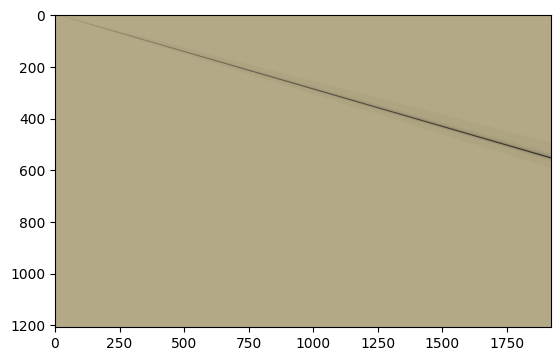

In [13]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
img = cv2.imread('../resources/sekonix_imgs/0.png', -1)
transform = np.array([[ 0.01539022, -0.99980282, -0.0125486],
                      [-0.02242849, 0.01220176,-0.99967399], 
                      [0.99962998, 0.01566665, -0.02223628]], dtype=np.float32)
transform = np.array([[ 0.01539022,-0.02242849,0.99962998],
 [-0.99980282  ,0.01220176,  0.01566665],
 [-0.01254862 ,-0.99967399, -0.02223628]], dtype=np.float32)
transform = np.array([[ 9.99999958e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.23991254e-01,  3.70774248e-01,  5.45256247e-04],
       [-1.31731409e+03, -2.08612650e+03, -3.70774269e-01]])
result = cv2.warpPerspective(img, transform, (1920, 1208))
# print(img)
plt.imshow(result)

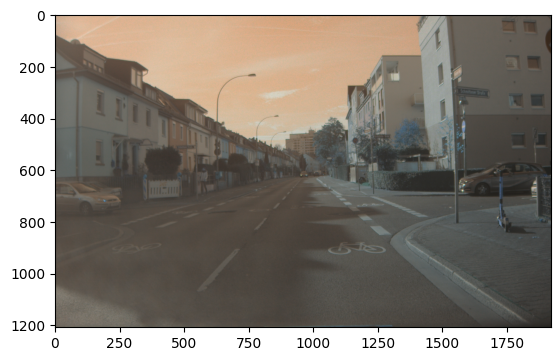

In [8]:

plt.imshow(img)

In [ ]:
from  scipy.spatial.transform import Rotation as R

In [ ]:
# 
roll_pitch_yaw = np.asarray(
    [0.7191797494888306, 1.2741498947143555, 0.8978915810585022, ])
a = R.from_euler('X', [], degrees=True).as_matrix()

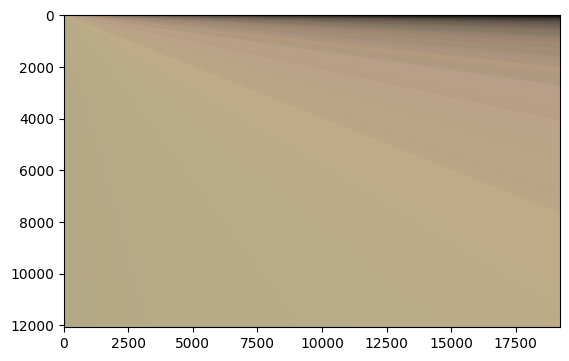

In [10]:
plt.imshow(result)

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import json

def calib_to_mat(x, input_quat=False, in_degrees=False):
    mat = np.eye(4)
    mat[:3, 3] = x[:3]
    if input_quat:
        mat[:3, :3] = R.from_quat(x[3:]).as_matrix()
    else:
        mat[:3, :3] = R.from_euler(
            'xyz', x[3:], degrees=in_degrees).as_matrix()
    return mat


def read_camera_params_json(json_file):
    with open(json_file, 'r') as f:
        configs = json.load(f)
    return configs['rig']['sensors']

json_file = 'resources/driveworks_processing_config_AGX_XA.json'



In [3]:
# SENSOR2RIG == CAM2VEH
# The order of the angle matters. 
roll_pitch_yaw = np.asarray(
    [0.7191797494888306, 1.2741498947143555, 0.8978915810585022, ])
translation = np.asarray([1.8402763605117798, -0.02772464230656624, 1.3100210428237915])
# needs cam2vehicle


In [4]:
# original code
cam_coord_2_vehicle_coord = np.array([[0.0, 0.0, 1.0, 0.0], [-1.0, 0.0,
                          0.0, 0.0], [0.0, -1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ])
cam2veh_rt = calib_to_mat(np.concatenate(
    (translation, roll_pitch_yaw)), input_quat=False, in_degrees=True)
cam2veh_rt = cam2veh_rt @ cam_coord_2_vehicle_coord
print(f'cam 2 vehicle rt: \n{cam2veh_rt}')
veh2cam_rt = np.linalg.inv(cam2veh_rt)
print(f'vehicle 2 cam rt: \n{veh2cam_rt}')

cam 2 vehicle rt: 
[[ 0.01539022 -0.02242849  0.99962998  1.84027636]
 [-0.99980282  0.01220176  0.01566665 -0.02772464]
 [-0.01254862 -0.99967399 -0.02223628  1.31002104]
 [ 0.          0.          0.          1.        ]]
[[ 0.01539022 -0.99980282 -0.01254862 -0.03960247]
 [-0.02242849  0.01220176 -0.99967399  1.35120686]
 [ 0.99962998  0.01566665 -0.02223628 -1.81003108]
 [ 0.          0.          0.          1.        ]]


In [ ]:
# assuming 
cam2veh = R.from_euler('')

cam2veh =    @ roll_pitch_yaw @ X.T # X is in cam coordinate 

In [3]:
import MySQLdb as mysql
db = mysql.connect('10.221.248.49', 'root', 'change-me', 'aanot')
cursor = db.cursor()
table_name = 'annotations'


In [ ]:

def get_gt_from_db(cursor, table_name, measurement_name, time, pseudo='false'):
    sql_query = f'select * from {table_name} anno where anno.timestamp = \
            (select an.timestamp from {table_name} an \
                where mid = "{measurement_name}" \
                    order by abs(an.timestamp - current_timestamp) limit 1);'



In [6]:
import MySQLdb as mysql
db = mysql.connect('10.221.248.49', 'root', 'change-me', 'aanot')
cursor = db.cursor()
table_name = 'annotations'

# write the projection code

# get the GT in the vehicle coordinate x
obj = np.random.random([10,10])
xyz = 50 * np.random.random([10, 3]) # xyz
size = 4 * np.random.random([10, 3]) # whl
yaw = 3.14 * 2 * np.random.random([10 ,1]) - 3.14

combined = np.concatenate([xyz, size, yaw], axis=1)
print(combined)

# get the image

# objects to 8 pts.
pts = np.array([
    [l2, w2, -h2],
    [l2, -w2, -h2],
    [-l2, -w2, -h2],
    [-l2, w2, -h2],
    [l2, w2, h2],
    [l2, -w2, h2],
    [-l2, -w2, h2],
    [-l2, w2, h2],
], dtype=np.float32)

# for each object. 
yaw_matrix = R.from_euler('Z', theta, degrees=True).as_matrix()


# in local coordinate
# rotate theta angle
pts_after_yaw = pts @ yaw_matrix 

# 8 pts to vehicle coordinate
pts_in_vehicle = pts_after_yaw + xyz 

# from 8 by 3 to 8 by 4 
pts_in_vehicle = np.concatenate([pts_in_vehicle, np.ones([8, 1])], axis=-1)
# tranform from vehicle coordinate into image coordinate
objs_in_cam = pts_in_vehicle @ veh2cam_rt

# 8 pts from camera to img coordinate
cam2img = np.array([[1834.21, 0, 961.74], [0, 1834.21, 680.69], [0, 0, 1]], dtype=np.float32)

objs_in_img = objs_in_cam @ cam2img





[[ 1.65577087e+01  4.41241777e+01  4.87318803e+00  1.07193034e+00
   3.75576724e+00  2.50824560e+00 -1.62573915e+00]
 [ 3.40464230e+01  2.88856632e+01  8.22483365e+00  3.53346964e+00
   2.45423611e+00  2.43929563e+00  2.78740063e+00]
 [ 1.16037481e+01  3.21087366e+01  4.20185626e+01  1.21711707e-02
   9.77077566e-01  2.27220992e+00 -3.10168923e-01]
 [ 3.08920455e+01  4.82841135e+01  5.27800014e+00  1.84869778e+00
   1.79890761e+00  2.57974617e+00  1.18850719e+00]
 [ 1.54665749e+01  4.12339603e+01  5.62878948e+00  7.26203037e-01
   2.35906766e+00  3.95920013e+00  7.13641750e-04]
 [ 3.66763816e+01  4.96389343e+01  2.70907827e+01  5.33488236e-01
   3.12862197e+00  4.87188551e-01  1.29621263e+00]
 [ 4.07713082e+01  2.68550251e+01  7.91219040e+00  7.30496819e-02
   2.32682642e+00  9.70842760e-01  3.11482328e-01]
 [ 3.45038729e+01  3.57190843e+01  3.21600699e+01  3.60019565e+00
   7.23165810e-02  1.18018328e+00 -1.52045596e+00]
 [ 4.53836209e+00  2.58026964e+01  3.25175525e+01  3.21708054e+0

In [16]:
# -*- coding: utf-8 -*-
import numpy as np
import cv2

class IPM(object):
    """
    Inverse perspective mapping to a bird-eye view. Assume pin-hole camera model.
    There are detailed explanation of every step in the comments, and variable names in the code follow these conventions:
    `_c` for camera coordinates
    `_w` for world coordinates
    `uv` for perspective transformed uv 2d coordinates (the input image)
    """
    def __init__(self, camera_info, ipm_info):
        self.camera_info = camera_info
        self.ipm_info = ipm_info

        ## Construct matrices T, R, K
        self.T = np.eye(4)
        self.T[2, 3] = -camera_info.camera_height # 4x4 translation matrix in 3d space (3d homo coordinate)
        _cy = np.cos(camera_info.yaw   * np.pi / 180.)
        _sy = np.sin(camera_info.yaw   * np.pi / 180.)
        _cp = np.cos(camera_info.pitch * np.pi / 180.)
        _sp = np.sin(camera_info.pitch * np.pi / 180.)
        tyaw = np.array([[_cy, 0, -_sy],
                         [0, 1, 0],
                         [_sy, 0, _cy]])
        tyaw_inv = np.array([[_cy, 0, _sy],
                             [0, 1, 0],
                             [-_sy, 0, _cy]])
        tpitch = np.array([[1, 0, 0],
                           [0, _cp, -_sp],
                           [0, _sp, _cp]])
        tpitch_inv = np.array([[1, 0, 0],
                               [0, _cp, _sp],
                               [0, -_sp, _cp]])
        self.R = np.dot(tyaw, tpitch) # 3x3 Rotation matrix in 3d space
        self.R_inv = np.dot(tpitch_inv, tyaw_inv)
        self.K = np.array([[camera_info.f_x, 0, camera_info.u_x],
                           [0, camera_info.f_y, camera_info.u_y],
                           [0, 0, 1]]).astype(np.float32) # 3x3 intrinsic perspective projection matrix

        ## The ground plane z=0 in the world coordinates, transform to a plane `np.dot(self.normal_c, point) = self.const_c` in the camera coordinates. 
        # This is used to find (x,y,z)_c according to (u,v). See method `uv2xy` for detail.
        self.normal_c = np.dot(self.R, np.array([0,0,1])[:, None]) # normal of ground plane equation in camera coordinates
        self.const_c = np.dot(self.normal_c.T, 
                              np.dot(self.R,
                                     np.dot(self.T, np.array([0,0,0,1])[:, None])[:3])) # constant of ground plane equation in camera coordinates

        ## Get the limit to be converted on the uv map (must below vanishing point)
        # To calculate (u,v) of the vanishing point on the uv map of delta vector v=[0,1,0] in the world coordinates
        # homo coordinates of a vector will be v_4 = [0, 1, 0, 0], mapping this vector to camera coordinate:
        # vc_3 = np.dot(R_4, np.dot(T_4, v_4))[:3] = np.dot(R, v), the 2d homo coordinate of the vanishing point will be at 
        # lim_{\lambda -> \infty} np.dot(K, lambda * vc_3) = np.dot(K, vc_3)

        # lane_vec_c = np.dot(self.R, np.array([0,1,0])[:, None]) # lane vector in camera coordinates
        # lane_vec_homo_uv = np.dot(self.K, lane_vec) # lane vector on uv map (2d homo coordinate)
        lane_vec_homo_uv = np.dot(self.K, np.dot(self.R, np.array([0,1,0])[:, None])) # lane vector on uv map (2d homo coordinate)
        vp = self.vp = lane_vec_homo_uv[:2] / lane_vec_homo_uv[2] # coordinates of the vanishing point of lanes on uv map
        
        # UGLY: This is an ugly op to ensure the converted area do not goes beyond the vanishing point, as the camera intrinsic/extrinsic parameters are not accurate in my case.
        ipm_top = self.ipm_top = max(ipm_info.top, vp[1]+ipm_info.input_height/15) 
        uv_limits = self.uv_limits = np.array([[ipm_info.left, ipm_top],
                              [ipm_info.right, ipm_top],
                              [vp[0], ipm_top],
                              [vp[0], ipm_info.bottom]]).T # the limits of the area on the uv map to be IPM-converted

        ## The x,y limit in the world coordinates is used to calculate xy_grid, and then the corresponding uv_grid
        self.xy_limits = self.uv2xy(uv_limits)
        xmin, xmax = min(self.xy_limits[0]), max(self.xy_limits[0])
        ymin, ymax = min(self.xy_limits[1]), max(self.xy_limits[1])
        stepx = (xmax - xmin) / ipm_info.out_width  # x to output pixel ratio
        stepy = (ymax - ymin) / ipm_info.out_height # y to output pixel ratio

        # xy_grid: what x,y coordinates in world coordinates will be stored in every output image pixel
        self.xy_grid = np.array([[(xmin + stepx * (0.5 + j), ymax - stepy * (0.5 + i)) for j in range(ipm_info.out_width)]
                                 for i in range(ipm_info.out_height)]).reshape(-1, 2).T
        # uv_grid: what u,v coordiantes on the uv map will be stored in every output image pixel
        self.uv_grid = self.xy2uv(self.xy_grid).astype(int)
        self.uv_grid = self.uv_grid * ((self.uv_grid[0] > ipm_info.left) * (self.uv_grid[0] < ipm_info.right) *\
                                       (self.uv_grid[1] > ipm_top) * (self.uv_grid[1] < ipm_info.bottom))
        self.uv_grid = tuple(self.uv_grid.reshape(2, ipm_info.out_height, ipm_info.out_width))
        self.uv_grid = (self.uv_grid[1], self.uv_grid[0])

    def xy2uv(self, xys): # all points have z=0 (ground plane): w (u,v,1) = KRT (x,y,z)_w
        xyzs = np.vstack((xys, -self.camera_info.camera_height * np.ones(xys.shape[1]))) # (x,y,z) after translation
        xyzs_c = np.dot(self.K, np.dot(self.R, xyzs)) # w(u,v,1) (2d homo)
        return xyzs_c[:2] / xyzs_c[2]

    def uv2xy(self, uvs): # all points have z=0 (ground plane): find (x,y,z)_c first, then x_w, y_w = (R^-1 (x,y,z)_c)[:2]
        uvs = (uvs - np.array([self.camera_info.u_x, self.camera_info.u_y])[:, None]) /\
              np.array([self.camera_info.f_x, self.camera_info.f_y])[:, None] # converted using camara intrinsic parameters
        uvs = np.vstack((uvs, np.ones(uvs.shape[1])))
        xyz_c = (self.const_c / np.dot(self.normal_c.T, uvs)) * uvs # solve the equation, get (x,y,z) on the ground plane in camera coordinates
        xy_w = np.dot(self.R_inv, xyz_c)[:2, :] # (x, y) on the ground plane in the world coordinates
        return xy_w

    def __call__(self, img):
        return self.ipm(img)

    def ipm(self, img):
        out_img = np.zeros((self.ipm_info.out_height, self.ipm_info.out_width))
        out_img[...] = img[self.uv_grid]
        return out_img

    def reverse_ipm(self, img, shape=None):
        if shape is None:
            shape = img.shape
        out_img = np.zeros(shape)
        out_img[self.uv_grid] = img
        return out_img

class _DictObjHolder(object):
    def __init__(self, dct):
        self.dct = dct

    def __getattr__(self, name):
        return self.dct[name]

if __name__ == "__main__":
    import os
    import sys
    # sys.path.insert(0, os.path.expanduser("~/caffe/python/"))
    import matplotlib
    matplotlib.use("Agg")
    import matplotlib.pyplot as plt
    # import caffe

    camera_info = _DictObjHolder({
        "f_x": 1834,         # focal length x
        "f_y": 1834,         # focal length y
        "u_x": 961,             # optical center x
        "u_y": 680,             # optical center y
        "camera_height": 2000,  # camera height in `mm`
        "pitch": 87,            # rotation degree around x
        "yaw": 5                # rotation degree around y
    })
    ipm_info = _DictObjHolder({
        "input_width": 1920,
        "input_height": 1208,
        "out_width": 1920,
        "out_height": 1208,
        "left": 40,
        "right": 1800,
        "top": 190,
        "bottom": 1200
    })

    path = sys.argv[1]
    # img = caffe.io.load_image(path) 
    # img = caffe.io.resize(img, (480, 640))
    img = cv2.imread('../resources/sekonix_imgs/0.png', -1)
    if len(img.shape) == 3:
        img = np.dot(img, [0.299, 0.587, 0.114])
    ipm = IPM(camera_info, ipm_info)
    out_img = ipm(img)

    fig = plt.figure()
    ax = fig.add_subplot(211)
    ax.imshow(img)
    ax = fig.add_subplot(212)
    ax.imshow(out_img)
    # plt.savefig("./try_ipm.png")

/tmp/ipykernel_514393/4171903792.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  uv_limits = self.uv_limits = np.array([[ipm_info.left, ipm_top],
